In [2]:
# import os
import pandas as pd
import numpy as np
# import regex as re
from collections import defaultdict
# from typing import Tuple, List, NewType
# from tqdm.notebook import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns 
# %config InlineBackend.figure_format = 'retina'

import logging

In [3]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Load Epitope Database

In [33]:
path_cohort = '~/UMCUtrecht/KaplanMeier/DESAsurvival.pickle'
path_antibody = '~/UMCUtrecht/20211104_mismatch_ep_db.pickle'
df_abs = pd.read_pickle(path_antibody)
df_cohort = pd.read_pickle(path_cohort)
df = df_abs.merge(df_cohort, on='TransplantID')
eptiopes = pd.read_pickle('EpitopevsHLA.pickle')

###  Distribution of the Epitope Antibodies in Tx failed during the first year

In [45]:
ind = df.GraftSurvivalY1_R < 1
ind_desa = df['#DESA'] >= 1
E = 'FailureCode10Y_R'
T = 'GraftSurvivalY1_R'
df = df[ind & ind_desa]
print(f'Number of Transplants getting failled within 1-year after transplantation: {len(df)}',
f'This includes failed Tx (1) proportional to censored Tx (0) of the balance {dict(df[E].value_counts())}')


Number of Transplants getting failled within 1-year after transplantation: 74 This includes failed Tx proportional to censored data of the balance {1: 59, 0: 15}


In [63]:
# Finding the DESA in the transplants that failed in the first year after transplantation
DESA_1_year = set([eptiope for epitope_set in df[df[E] == 1]['DESA'] for eptiope in epitope_set])

In [74]:
ind_ep = eptiopes['Epitope'].apply(lambda x: x in DESA_1_year)
eptiopes[ind_ep]['mean_distance [A]']


0

## Epitopes Distribution from Tx failed within 1-year post-transplantation 

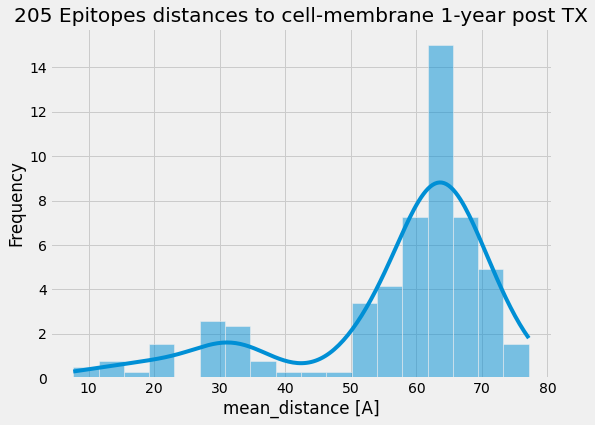

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(eptiopes[ind_ep]['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes[ind_ep])} Epitopes distances to cell-membrane 1-year post TX');


## Whole Epitope database distribution

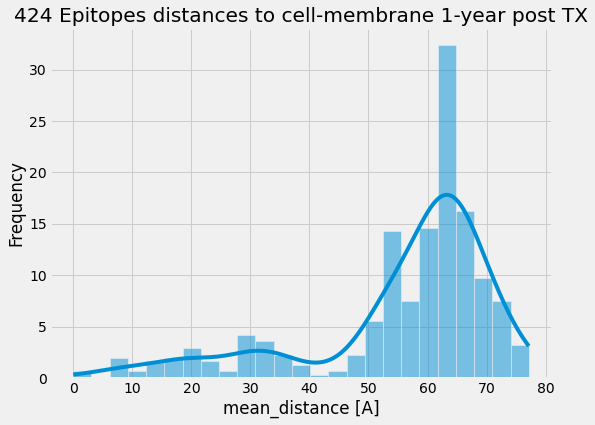

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(eptiopes['mean_distance [A]'], kde=True, stat='frequency', ax=ax)
ax.set_title(f'{len(eptiopes)} Epitopes distances to cell-membrane 1-year post TX');

# Epitope Distances based on Elli-Pro Score

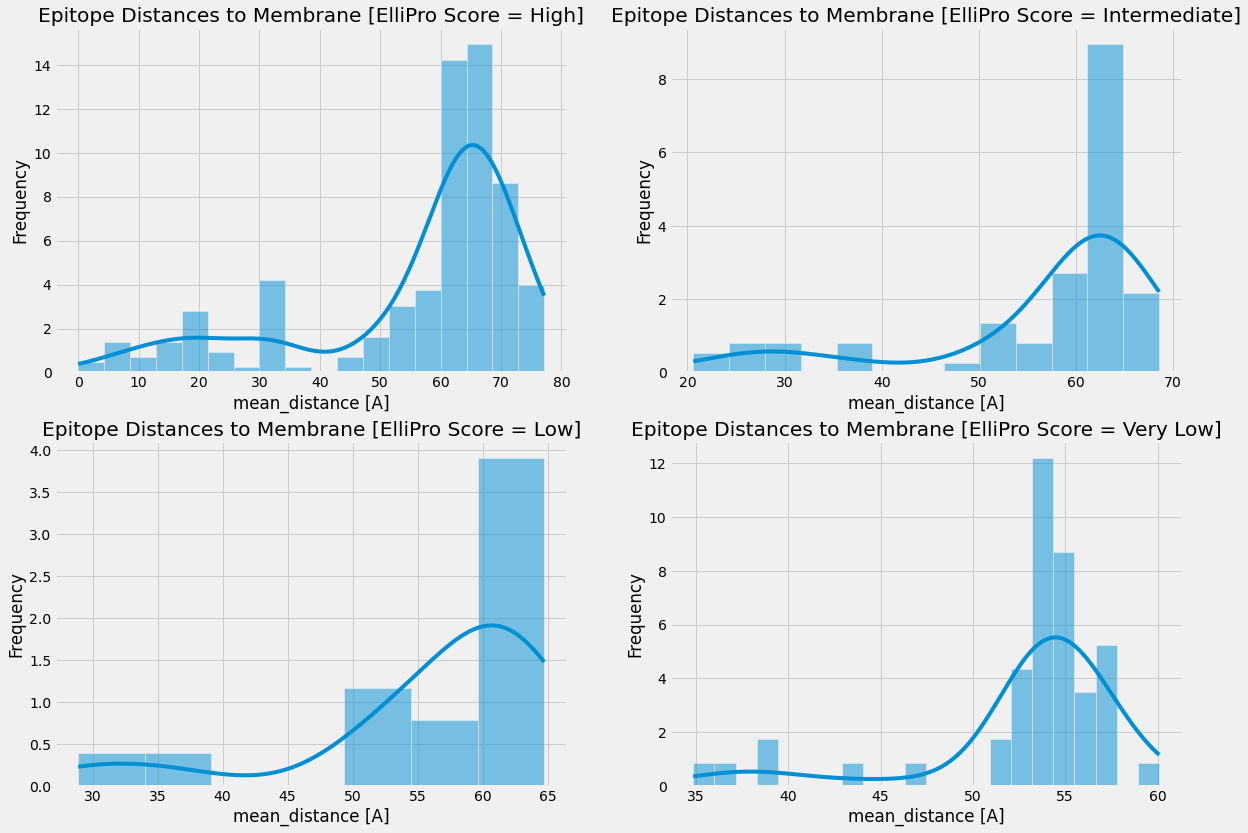

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(18,13))
ind = eptiopes['ElliPro Score'] == 'High'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[0,0]);
ax[0,0].set_title('Epitope Distances to Membrane [ElliPro Score = High]');

ind = eptiopes['ElliPro Score'] == 'Intermediate'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[0,1]);
ax[0,1].set_title('Epitope Distances to Membrane [ElliPro Score = Intermediate]');

ind = eptiopes['ElliPro Score'] == 'Low'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[1,0]);
ax[1,0].set_title('Epitope Distances to Membrane [ElliPro Score = Low]');

ind = eptiopes['ElliPro Score'] == 'Very Low'
sns.histplot(eptiopes[ind]['mean_distance [A]'], kde=True, stat='frequency', ax=ax[1,1]);
ax[1,1].set_title('Epitope Distances to Membrane [ElliPro Score = Very Low]');
fig.savefig('overview.pdf')